In [1]:
#IMPORTING LIBRARIES AND FUNCTIONS

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [60]:
#DATA COLLECTION & PREPROCESSING

#loading the dataset into pandas dataframe

loan_dataset =pd. read_csv('Downloads/loanstatus.csv')

In [61]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [62]:
#display first 5 rows of dataframe

loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [63]:
loan_dataset.shape

(614, 13)

In [64]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [65]:
#count number of missing values in each rows

loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [66]:
#dropping missing values

loan_dataset = loan_dataset.dropna()

In [67]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [68]:
#label encoding 

loan_dataset= loan_dataset.replace({"Loan_Status":{'N':0, 'Y':1}})


In [69]:
#display first 5 rows of dataframe again

loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [70]:
#Dependent column values

loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [79]:
#replacing the value of 3+ into 4

loan_dataset= loan_dataset.replace(to_replace= '3+', value=4)

In [80]:
loan_dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

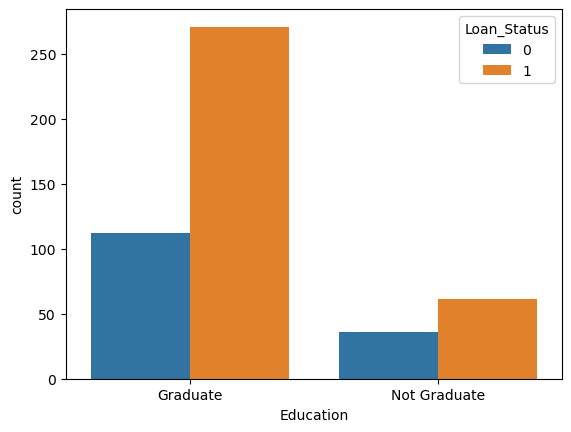

In [33]:
#DATA VISUALIZATION

#Education and Loan Status

sns.countplot(x='Education', hue='Loan_Status', data= loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

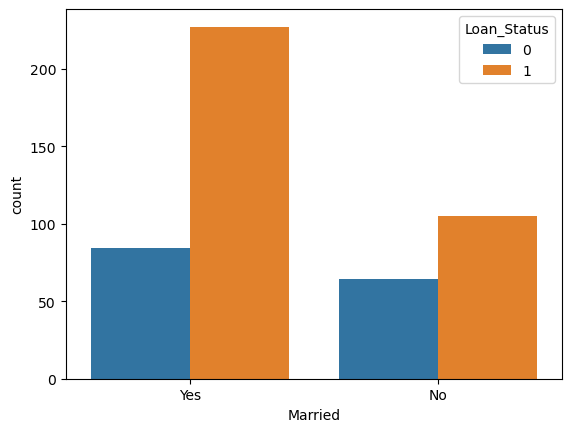

In [34]:
#Marital status and Loan Status

sns.countplot(x='Married', hue='Loan_Status', data= loan_dataset)

<Axes: xlabel='Gender', ylabel='count'>

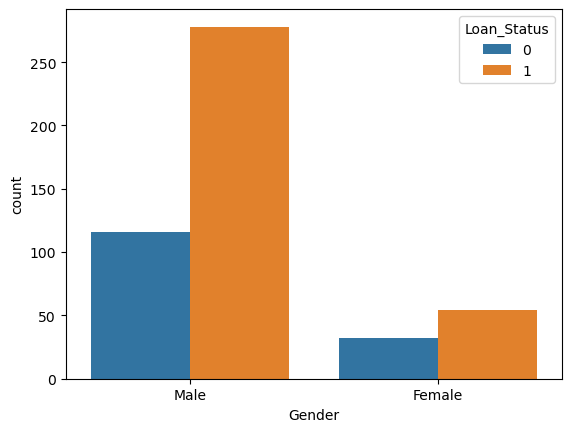

In [35]:
#Gender and Loan Status

sns.countplot(x='Gender', hue='Loan_Status', data= loan_dataset)

<Axes: xlabel='Property_Area', ylabel='count'>

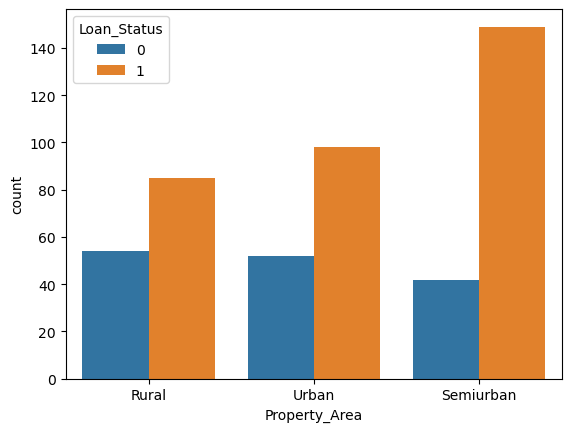

In [37]:
#Property Area and Loan Status

sns.countplot(x='Property_Area', hue='Loan_Status', data= loan_dataset)

In [81]:
#CONVERTING EVERY LABELS INTO 0 AND 1
pd.set_option('future.no_silent_downcasting', True)

loan_dataset= loan_dataset.replace({"Married":{'No':0, 'Yes':1},
                                    "Gender":{'Male':1, 'Female':0},
                                    "Self_Employed":{'No':0,'Yes':1},
                                    "Property_Area":{'Rural':0,'Semiurban':1,'Urban':2},
                                    "Education":{'Graduate':1,'Not Graduate':0}})

In [82]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [84]:
#SEPARATING THE DATA AND LABEL

x= loan_dataset.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
y= loan_dataset['Loan_Status']

In [85]:
print(x)
print(y)

    Gender Married Dependents Education Self_Employed  ApplicantIncome  \
1        1       1          1         1             0             4583   
2        1       1          0         1             1             3000   
3        1       1          0         0             0             2583   
4        1       0          0         1             0             6000   
5        1       1          2         1             1             5417   
..     ...     ...        ...       ...           ...              ...   
609      0       0          0         1             0             2900   
610      1       1          4         1             0             4106   
611      1       1          1         1             0             8072   
612      1       1          2         1             0             7583   
613      0       0          0         1             1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1               1508.0       128.0     

In [92]:
#TRAIN & TEST SPLIT

Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.1, stratify= y, random_state=2)

In [115]:
print(x.shape, Xtrain.shape, Xtest.shape)

(480, 11) (432, 11) (48, 11)


In [94]:
#TRAINING THE MODEL:
#SUPPORT VECTOR MACHINE MODEL

classifier= svm.SVC(kernel='linear')


In [114]:
Ytrain = Ytrain.astype(int)

Ytest = Ytest.astype(int)

In [113]:
#training the SVM model
classifier.fit(Xtrain, Ytrain)

SVC(kernel='linear')

In [98]:
#Model Evaluation

#ACCURACY SCORE ON TRAINING DATA

Xtrain_prediction= classifier.predict(Xtrain)
training_data_accuracy= accuracy_score(Xtrain_prediction, Ytrain)

In [112]:
print("accuracy on training data is:", training_data_accuracy)

accuracy on training data is: 0.7986111111111112


In [110]:
#ACCURACY SCORE ON TEST DATA

Xtest_prediction= classifier.predict(Xtest)
test_data_accuracy= accuracy_score(Xtest_prediction, Ytest)

In [111]:
print("accuracy on test data is:", test_data_accuracy)

accuracy on test data is: 0.8333333333333334


In [125]:
#MAKING A PREDICTIVE SYSTEM
input_data=(0,0,4,1,0,3499,5000,158,360,1,1)
#changing th array to numpy array 
input_data_as_numpy_array=np.asarray(input_data)
prediction=classifier.predict(input_data_as_numpy_array.reshape(1,-1))
print(prediction)
if (prediction[0]==0):
  print('Loan not approved')
else:
  print('Loan approved')

[1]
Loan approved


D:\video\AnyDesk\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
